# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

# Dataset

**Columns**

1. **Age** - Age of patient
2. **Sex** - Sex of patient
3. **Chest Pain type** - chest pain type (4 values)
4. **Resting Blood pressure** - resting blood pressure
5. **Serum Cholestoral in mg/dl** - serum cholestoral in mg/dl
6. **Fasting Blood sugar > 120 mg/dl** - fasting blood sugar > 120 mg/dl
7. **Resting Electrocardiographic results** - resting electrocardiographic results (values 0,1,2)
8. **Max heart rate achieved** - maximum heart rate achieved
9. **Exercise induced angina** - exercise induced angina
10. **Oldpeak** - oldpeak = ST depression induced by exercise relative to rest
11. **Slope of the peak exercise ST segment** - the slope of the peak exercise ST segment
12. **No of major vessels** - number of major vessels (0-3) colored by flourosopy
13. **Thal** - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **Presence** - Target :Absence (1) or presence (2) of heart disease

In [2]:
data_path = '/kaggle/input/heart-disease-uci-dataset/heart.csv'

df = pd.read_csv(data_path)
df.head()

,Age,Sex,Chest Pain type,Resting Blood pressure,Serum Cholestoral in mg/dl,Fasting Blood sugar > 120 mg/dl,Resting Electrocardiographic results,Max heart rate achieved,Exercise induced angina,Oldpeak,Slope of the peak exercise ST segment,No of major vessels,Thal,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
Age                                      270 non-null int64
Sex                                      270 non-null int64
Chest Pain type                          270 non-null int64
Resting Blood pressure                   270 non-null int64
Serum Cholestoral in mg/dl               270 non-null int64
Fasting Blood sugar > 120 mg/dl          270 non-null int64
Resting Electrocardiographic results     270 non-null int64
Max heart rate achieved                  270 non-null int64
Exercise induced angina                  270 non-null int64
Oldpeak                                  270 non-null float64
Slope of the peak exercise ST segment    270 non-null int64
No of major vessels                      270 non-null int64
Thal                                     270 non-null int64
Presence                                 270 non-null int64
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
df.describe()

,Age,Sex,Chest Pain type,Resting Blood pressure,Serum Cholestoral in mg/dl,Fasting Blood sugar > 120 mg/dl,Resting Electrocardiographic results,Max heart rate achieved,Exercise induced angina,Oldpeak,Slope of the peak exercise ST segment,No of major vessels,Thal,Presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
df.columns

Index(['Age', 'Sex', 'Chest Pain type', 'Resting Blood pressure',
       'Serum Cholestoral in mg/dl', 'Fasting Blood sugar > 120 mg/dl',
       'Resting Electrocardiographic results', 'Max heart rate achieved',
       'Exercise induced angina', 'Oldpeak',
       'Slope of the peak exercise ST segment', 'No of major vessels', 'Thal',
       'Presence'],
      dtype='object')

In [6]:
new_columns = [col.replace(' ', '_') for col in df.columns]
df.columns = new_columns
new_columns

['Age',
 'Sex',
 'Chest_Pain_type',
 'Resting_Blood_pressure',
 'Serum_Cholestoral_in_mg/dl',
 'Fasting_Blood_sugar_>_120_mg/dl',
 'Resting_Electrocardiographic_results',
 'Max_heart_rate_achieved',
 'Exercise_induced_angina',
 'Oldpeak',
 'Slope_of_the_peak_exercise_ST_segment',
 'No_of_major_vessels',
 'Thal',
 'Presence']

# Visualization

## Correlation

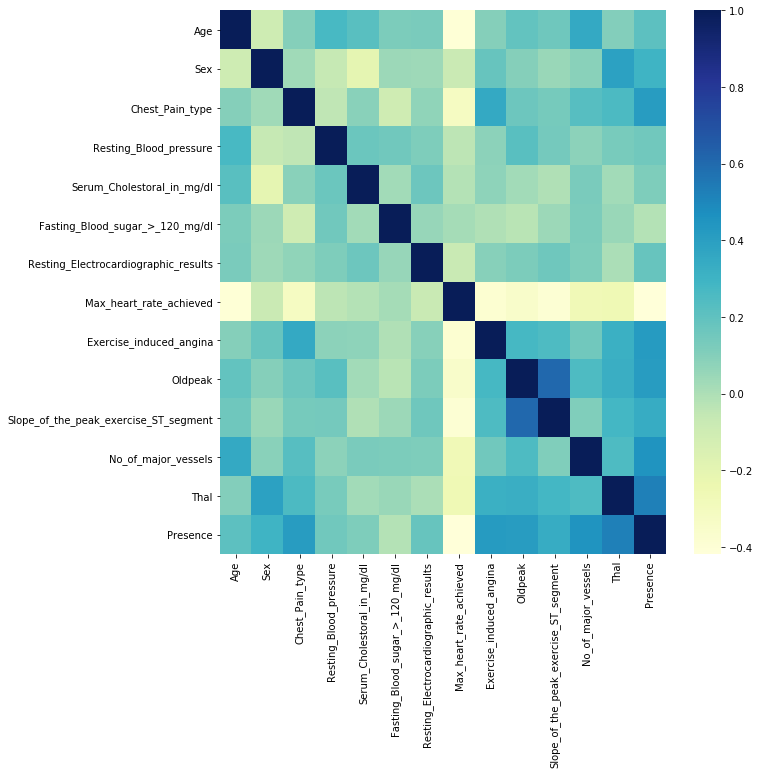

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu");

## Heart disease

In [8]:
df_presence = df[df.Presence == 2]
df_absence = df[df.Presence == 1]

df_sex_0 = df[df.Sex == 0]
df_sex_1 = df[df.Sex == 1]

## Age distribution of the presence of heart disease by gender

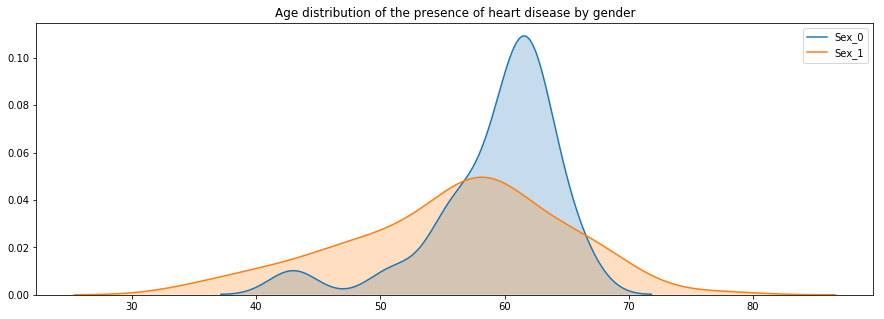

In [9]:
sex_0 = df_presence[df_presence.Sex == 0]
sex_1 = df_presence[df_presence.Sex == 1]
plt.figure(figsize=(15,5))
plt.title("Age distribution of the presence of heart disease by gender")
sns.kdeplot(data=sex_0['Age'], shade=True, label='Sex_0');
sns.kdeplot(data=sex_1['Age'], shade=True, label='Sex_1');

## Sex

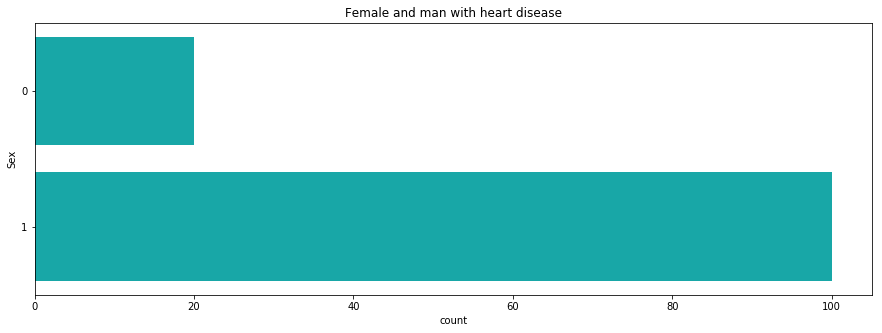

In [10]:
plt.subplots(figsize=(15, 5))
plt.title('Female and man with heart disease')
sns.countplot(y="Sex", data=df_presence, color="c");

## Chest pain type

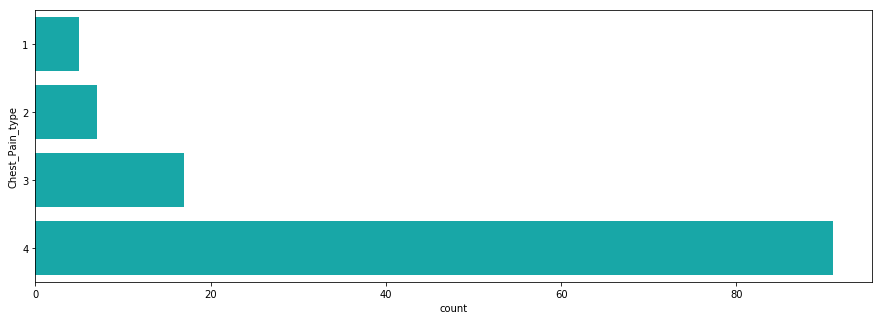

In [11]:
plt.subplots(figsize=(15, 5))
sns.countplot(y="Chest_Pain_type", data=df_presence, color="c");

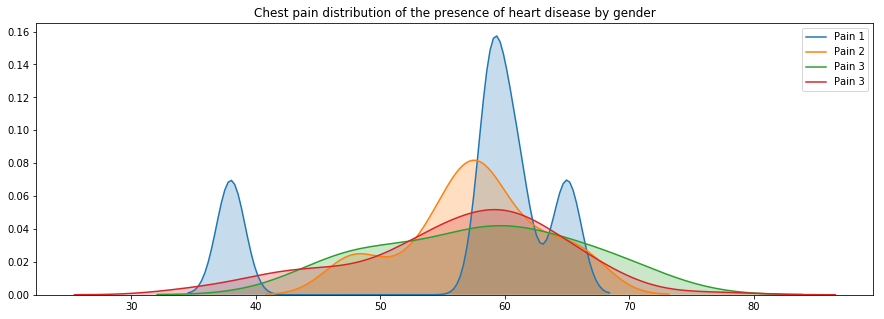

In [12]:
pain_1 = df_presence[df_presence.Chest_Pain_type == 1]
pain_2 = df_presence[df_presence.Chest_Pain_type == 2]
pain_3 = df_presence[df_presence.Chest_Pain_type == 3]
pain_4 = df_presence[df_presence.Chest_Pain_type == 4]

plt.figure(figsize=(15,5))
plt.title("Chest pain distribution of the presence of heart disease by gender")
sns.kdeplot(data=pain_1['Age'], shade=True, label='Pain 1');
sns.kdeplot(data=pain_2['Age'], shade=True, label='Pain 2');
sns.kdeplot(data=pain_3['Age'], shade=True, label='Pain 3');
sns.kdeplot(data=pain_4['Age'], shade=True, label='Pain 3');

## Mean resting blood pressure for sex 0

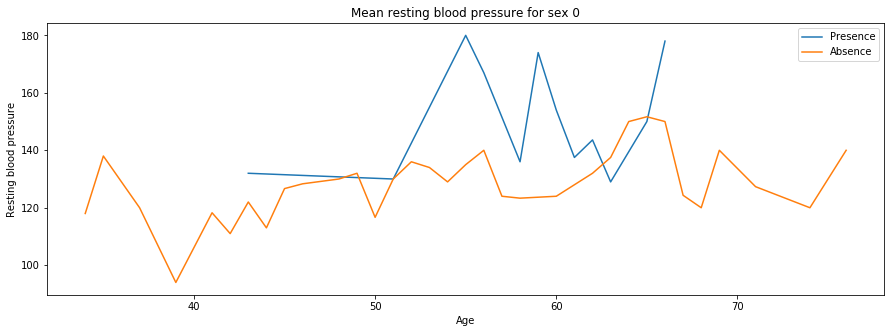

In [13]:
plt.figure(figsize=(15,5))
plt.title("Mean resting blood pressure for sex 0")
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
data = df[df.Sex == 0]

sns.lineplot(
    data=data[data.Presence == 2].groupby(['Age'])['Resting_Blood_pressure'].mean(), 
    label='Presence'
);

sns.lineplot(
    data=data[data.Presence == 1].groupby(['Age'])['Resting_Blood_pressure'].mean(), 
    label='Absence'
);

## Mean resting blood pressure for sex 1

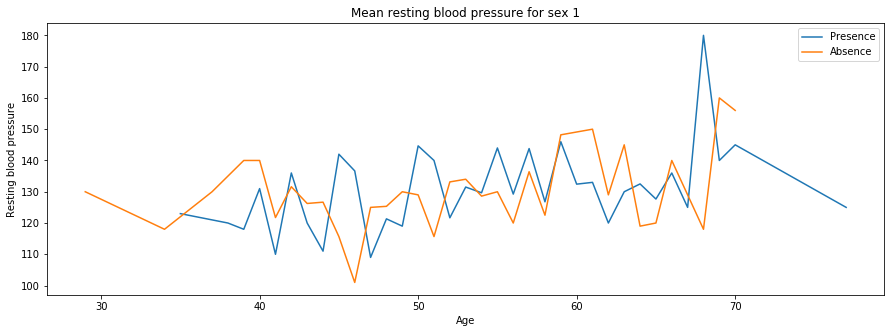

In [14]:
plt.figure(figsize=(15,5))
plt.title("Mean resting blood pressure for sex 1")
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
data = df[df.Sex == 1]

sns.lineplot(
    data=data[data.Presence == 2].groupby(['Age'])['Resting_Blood_pressure'].mean(), 
    label='Presence'
);

sns.lineplot(
    data=data[data.Presence == 1].groupby(['Age'])['Resting_Blood_pressure'].mean(), 
    label='Absence'
);

## Serum cholestoral in mg/dl

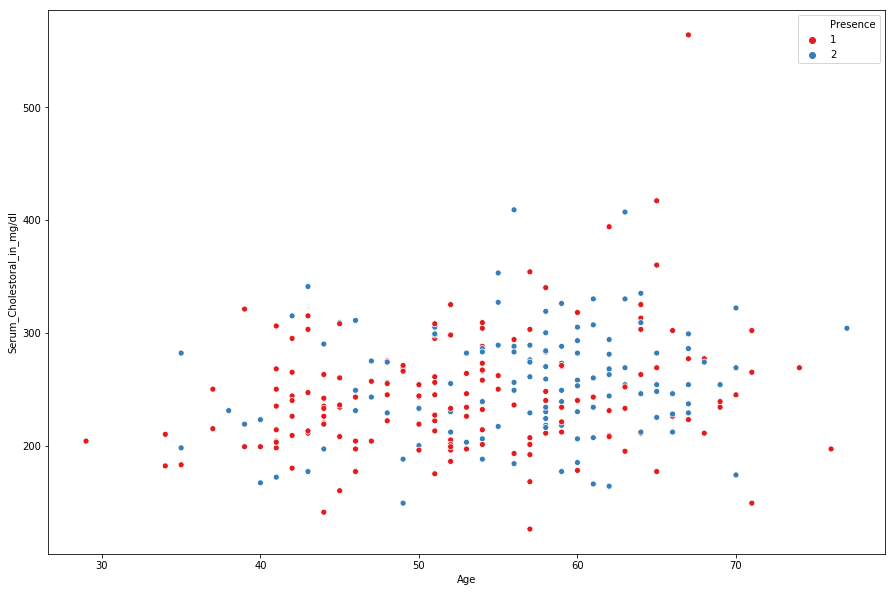

In [15]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Age", y="Serum_Cholestoral_in_mg/dl", hue="Presence", palette="Set1", data=df);

# PCA - Principal component analysis

In [16]:
num_features = len(df.columns) - 1
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigen vals: {}'.format(eigen_vals))

Eigen vals: [3.02728222 1.76384681 1.28004623 1.20568695 1.04966645 0.30179266
 0.39079815 0.44588159 0.82675096 0.76520437 0.79624638 0.62473428
 0.59121187]


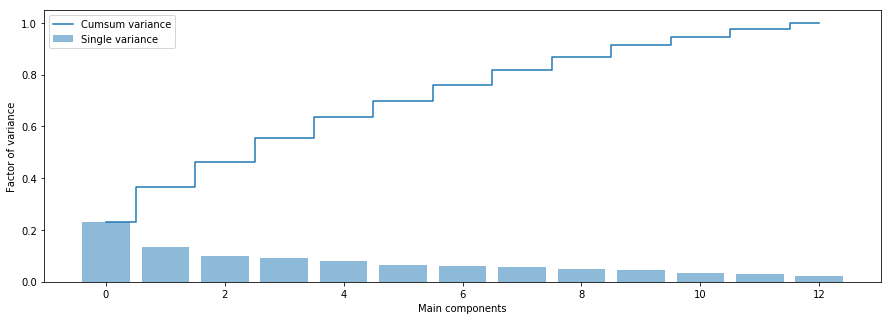

In [18]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(15,5))
plt.bar(range(num_features), var_exp, alpha=.5, align='center', label='Single variance')
plt.step(range(num_features), cum_var_exp, where='mid', label='Cumsum variance')
plt.ylabel('Factor of variance')
plt.xlabel('Main components')
plt.legend(loc='best')
plt.show()

In [19]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse=True)
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n{}'.format(W))

Matrix W: 
[[-0.27081913 -0.37387347]
 [-0.11508354  0.51473766]
 [-0.27573564  0.17426701]
 [-0.18542085 -0.38209241]
 [-0.11702016 -0.40563559]
 [-0.0189494  -0.17695478]
 [-0.20099161 -0.24856524]
 [ 0.37938226 -0.05389232]
 [-0.31859759  0.24261871]
 [-0.40026734 -0.01972255]
 [-0.39019373 -0.0159678 ]
 [-0.28982044 -0.06402241]
 [-0.3265808   0.30781688]]


In [20]:
X_train_pca = X_train_std.dot(W)
X_test_pca = X_test_std.dot(W)

# Models

In [21]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Report:\n{}'.format(classification_report(y_test, y_pred)))
    print('Score: {}'.format(model.score(X_test, y_test)))

## Logistic regression

In [22]:
lr = LogisticRegression()
run_model(lr, X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

Report:
              precision    recall  f1-score   support

           1       0.78      0.85      0.81        46
           2       0.77      0.69      0.73        35

    accuracy                           0.78        81
   macro avg       0.78      0.77      0.77        81
weighted avg       0.78      0.78      0.78        81

Score: 0.7777777777777778


## SVC

In [23]:
svc = SVC(kernel='linear', C=1.0, random_state=0)
run_model(svc, X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

Report:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        46
           2       0.77      0.77      0.77        35

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81

Score: 0.8024691358024691


### K-neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors=20, p=2, metric='minkowski')
run_model(knn, X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

Report:
              precision    recall  f1-score   support

           1       0.78      0.85      0.81        46
           2       0.77      0.69      0.73        35

    accuracy                           0.78        81
   macro avg       0.78      0.77      0.77        81
weighted avg       0.78      0.78      0.78        81

Score: 0.7777777777777778


# tbc ...